# Time Series Forecast with Prophet

## Introduction:
This is a simple kernel in which we will forecast stock prices using Prophet (Facebook's library for time series forecasting). However, historical prices are no indication whether a price will go up or down.  I'll rather use my own variables and use machine learning for stock price prediction rather than just using historical prices as an indication of stock price increase.


## A Summary about Prophet:
Facebook's research team has come up with an easier implementation of forecasting through it's new library called Prophet. From what I have read, the blog state's that analyst that can produce high quality forecasting data is rarely seen. This is one of the reasons why Facebook's research team came to an easily approachable way for using advanced concepts for time series forecasting and us Python users, can easily relate to this library since it uses Scikit-Learn's api (Similar to Scikit-Learn). To gain further information, you can look at  [Prophet Blog](https://research.fb.com/prophet-forecasting-at-scale/). Prophet's team main goal is to <b>to make it easier for experts and non-experts to make high quality forecasts that keep up with demand. </b> <br><br>

There are several characteristics of Prophet (you can see it in the blog) that I want to share with you Kaggles that shows where Prophet works best:
<ul>
<li>hourly, daily, or weekly observations with at least a few months (preferably a year) of history </li>
<li>strong multiple “human-scale” seasonalities: day of week and time of year </li>
<li>Important holidays that occur at irregular intervals that are known in advance (e.g. the Super Bowl) </li>
<li>A reasonable number of missing observations or large outliers </li>
<li>Historical trend changes, for instance due to product launches or logging changes </li>
<li>Trends that are non-linear growth curves, where a trend hits a natural limit or saturates </li>
</ul>
<br><br>

### How does Prophet Work?
---> In the process of Update.....


In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
from pandas.core import datetools
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

ImportError: cannot import name 'datetools' from 'pandas.core' (/Users/pierre/opt/anaconda3/lib/python3.7/site-packages/pandas/core/__init__.py)

In [2]:
df = pd.read_csv('data/COMP.csv')
df.head()

,Year,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
0,2019-12-31,3223.380000,NaN,NaN,257.139,1.91,3223.380000,NaN,NaN,30.913600
1,2019-11-30,3104.904500,NaN,NaN,257.208,1.81,3104.071562,NaN,NaN,29.911395
2,2019-10-31,2977.680000,NaN,NaN,257.346,1.71,2975.284860,NaN,NaN,28.840889
3,2019-09-30,2982.156000,57.220000,132.950000,256.759,1.70,2986.569552,57.304685,133.146764,29.229401
4,2019-08-31,2897.498182,56.839092,133.723333,256.558,1.63,2904.059842,56.967809,134.026163,28.705358


In [3]:
# Brief Description of our dataset
df.describe()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
count,1788.000000,1785.000000,1785.000000,1788.000000,1788.000000,1788.000000,1785.000000,1785.000000,1668.000000
mean,287.415617,6.122340,14.164525,59.924884,4.545914,549.644435,15.995563,31.897773,17.010681
std,579.830261,10.741199,26.781028,73.387977,2.288319,610.184250,9.514509,26.696177,6.850493
min,2.730000,0.180000,0.160000,6.279613,1.500000,69.604422,5.128982,4.310423,4.784241
25%,7.847500,0.416700,0.550000,10.180580,3.228750,175.221455,8.831556,13.130502,11.845960
50%,16.915000,0.850000,1.397000,19.150000,3.838333,263.855931,13.265918,21.470555,16.271201
75%,134.725000,6.823330,14.580000,97.725000,5.172500,652.620646,20.304966,40.823415,20.593007
max,3223.380000,57.220000,135.270000,257.346000,15.320000,3223.380000,57.304685,136.031444,44.197940


In [5]:
# Let's analyze some of the stocks.
amzn = df[['S&P Composite', 'Year']]
amzn.head()

,S&P Composite,Year
0,3223.380000,2019-12-31
1,3104.904500,2019-11-30
2,2977.680000,2019-10-31
3,2982.156000,2019-09-30
4,2897.498182,2019-08-31


We need to make sure if the date column is either a categorical type or a datetype. In our case date is a categorical datatype so we need to change it to datetime.

In [6]:
amzn.info() # Check whether the date is as object type or date type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S&P Composite  1788 non-null   float64
 1   Year           1788 non-null   object 
dtypes: float64(1), object(1)
memory usage: 28.1+ KB


In [7]:
#  Change to dateformat
amzn.head()

,S&P Composite,Year
0,3223.380000,2019-12-31
1,3104.904500,2019-11-30
2,2977.680000,2019-10-31
3,2982.156000,2019-09-30
4,2897.498182,2019-08-31


In [8]:
# Create a copy to avoid the SettingWarning .loc issue 
amzn_df = amzn.copy()
# Change to datetime datatype.
amzn_df.loc[:, 'Year'] = pd.to_datetime(amzn.loc[:,'Year'], format="%Y/%m/%d")

In [9]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   S&P Composite  1788 non-null   float64       
 1   Year           1788 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.1 KB


### Prophet Introduction:
Prophet is Facebook's library for time series forecasting. In my opinion, Prophet works best with datasets that are higely influenced by seasonality (electricity bills, restaurant visitors etc.) However, I wanted to show the simplicity of using Prophet for simple forecasting which is the main aim of this kernel.

#### Steps for using Prophet:
<ul>
<li>Make sure you replace closing price for y and date for ds. </li>
<li>Fit that dataframe to Prophet in order to detect future patterns. </li>
<li>Predict the upper and lower prices of the closing price. </li>
</ul>

In [10]:
m = Prophet()

# Drop the columns
ph_df = amzn_df
ph_df.rename(columns={'S&P Composite': 'y', 'Year': 'ds'}, inplace=True)

ph_df.head()

,y,ds
0,3223.380000,2019-12-31
1,3104.904500,2019-11-30
2,2977.680000,2019-10-31
3,2982.156000,2019-09-30
4,2897.498182,2019-08-31


In [11]:
m = Prophet()

m.fit(ph_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2148,2020-12-26,2375.898549,2192.264431,2553.052141
2149,2020-12-27,2371.876570,2195.232089,2548.299295
2150,2020-12-28,2366.574399,2185.119176,2531.149771
2151,2020-12-29,2360.057244,2187.572838,2531.612242
2152,2020-12-30,2352.421801,2170.897810,2513.666283


/Users/pierre/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


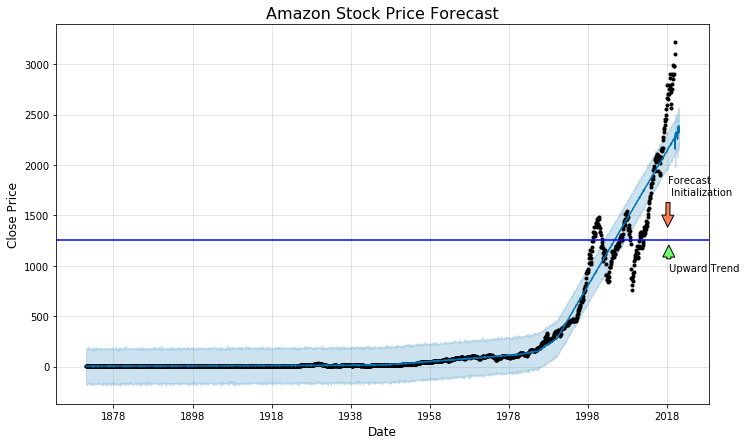

In [13]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Amazon Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1,950),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=1260, color='b', linestyle='-')

plt.show()

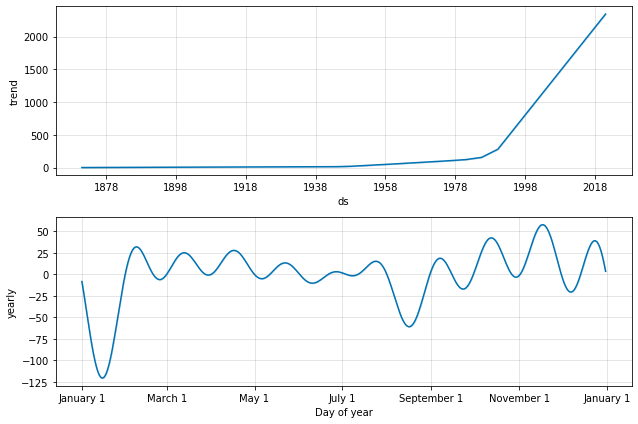

In [14]:
fig2 = m.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


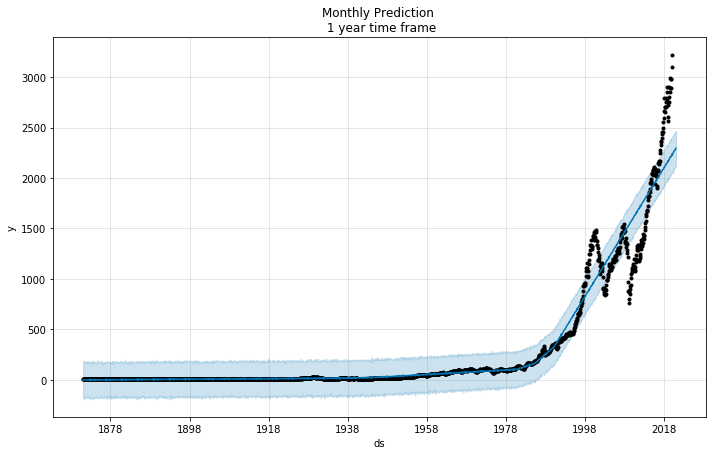

In [15]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

#### Trends:
<ul> 
<li>Amazon's stock price is showing signs of upper trend yearly. </li>
<li> Amazon's stock price show upper trend signs during January (December Sales tend to give a boost to Amazon's stock price)</li>
<li>There is no weekly trend for stock prices. </li>
</ul>

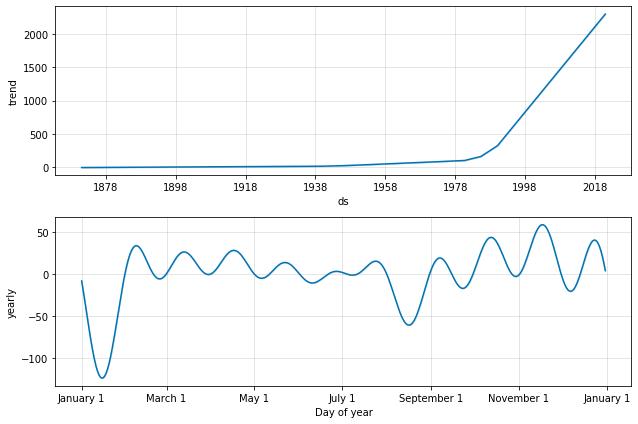

In [16]:
fig = m.plot_components(fcst)
plt.show()

<h2>Technical Analysis: </h2>
In this section we will go into basic technical concepts when dealing with stock investing. This are simple theories however, we shouldn't solely rely on these concepts to maximize profits as it is the case with patterns related to moving averages. Before going into this concepts, I will like to show how OHLC and Candlesticks are interpreted.

<h3 align="center">Open High Low Close (OHLC): </h3>
<img src="https://image.slidesharecdn.com/forexcandlestick-151105160826-lva1-app6892/95/forex-candlestick-5-638.jpg?cb=1446739926" ></img>
<br><br>
<h3 align="center">CandleSticks: </h3>
<img src="http://wealthv.com/learn/actionforex/images/candlestick_charts_explained_1.gif" ></img>
<br><br>
<h3 align="center">Moving Averages: </h3>
<img src="https://commodity.com/wp-content/uploads/technical-analysis/MASimple50200SPY.gif" ></img>

In [21]:
amzn_df.head()

,y,ds
0,3223.380000,2019-12-31
1,3104.904500,2019-11-30
2,2977.680000,2019-10-31
3,2982.156000,2019-09-30
4,2897.498182,2019-08-31


In [26]:
# Moving Averages (10, 50 and 200)
amzn_df['10_d_avg'] = amzn_df.y.rolling(window=10).mean()
amzn_df['50_d_avg'] = amzn_df.y.rolling(window=50).mean()
amzn_df['200_d_avg'] = amzn_df.y.rolling(window=200).mean()
close_p = amzn_df['y'].values.tolist()


# Variables to insert into plotly
ten_d = amzn_df['10_d_avg'].values.tolist()
fifty_d = amzn_df['50_d_avg'].values.tolist()
twoh_d = amzn_df['200_d_avg'].values.tolist()
date = amzn_df['ds'].values.tolist()

# Set date as index
amzn_df = amzn_df.set_index('ds')

<h2> Stocks more Susceptible to Seasonality Trends: </h2>
In this section I want to show some types of stocks that are more vulnerable to seasonality such as airlines, hotel chains or cruiseships. In this example I will use American Airlines to demonstrate how a certain extent of the stock is influenced by seasonality movements.

<h3>Summary: </h3>
<ul>
    <li>December and January tends to be the months were there are more upward trends for the stock. </li>
    <li>July as well but not as much as December and January. </li>
    <li>September tends to be the month with the most downward pressure. </li>
    </ul>
